In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from First_Dataset import First_Dataset

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
max_words = 5000
max_len = 50

In [4]:
dataset = First_Dataset()
dataset.preprocess()
dataset.encode_labels()
dataset.embed_tokens(max_words,max_len)
dataset.split()
Training_pad, Validation_pad, Testing_pad, Y_train, Y_val, Y_test = dataset.getData()

In [5]:
from BiLSTM import BiLSTM

In [6]:
model = BiLSTM(max_words, max_len)

In [26]:
model.tune(Training_pad,Y_train, Validation_pad, Y_val,"BiLSTM")

Reloading Tuner from Hyperparameter_Tuning\BiLSTM\tuner0.json

                The hyperparameter search is complete. The optimal embedding size is 16,
                the optimal units in the BiLSTM is 64
                the optimal number of units in the dense layer is 521 
                and the optimal dropout rate is 0.5.
                


In [9]:
model.fit(Training_pad,Y_train, Validation_pad, Y_val)

Epoch 1/50
140/140 [==============================] - 6s 20ms/step - loss: 8.2381 - accuracy: 0.8176 - val_loss: 0.7086 - val_accuracy: 0.7442 - lr: 0.0010
Epoch 2/50
140/140 [==============================] - 2s 14ms/step - loss: 0.3044 - accuracy: 0.9459 - val_loss: 0.6162 - val_accuracy: 0.7639 - lr: 0.0010
Epoch 3/50
140/140 [==============================] - 2s 14ms/step - loss: 0.2269 - accuracy: 0.9700 - val_loss: 0.7105 - val_accuracy: 0.7764 - lr: 0.0010
Epoch 4/50
140/140 [==============================] - 2s 14ms/step - loss: 0.2014 - accuracy: 0.9797 - val_loss: 0.6167 - val_accuracy: 0.8533 - lr: 0.0010
Epoch 5/50
140/140 [==============================] - 2s 14ms/step - loss: 0.1736 - accuracy: 0.9839 - val_loss: 0.3799 - val_accuracy: 0.9141 - lr: 0.0010
Epoch 6/50
140/140 [==============================] - 2s 14ms/step - loss: 0.1489 - accuracy: 0.9882 - val_loss: 0.5046 - val_accuracy: 0.9088 - lr: 0.0010
Epoch 7/50
140/140 [==============================] - 2s 15ms/st

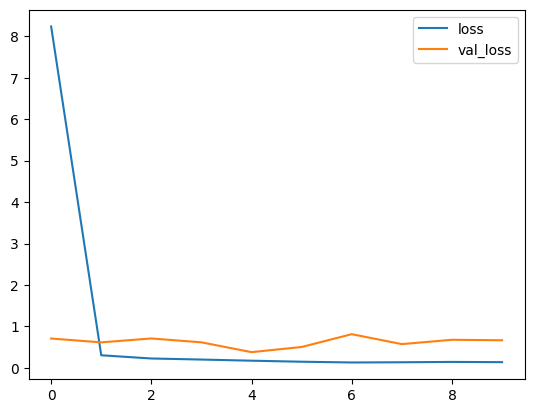

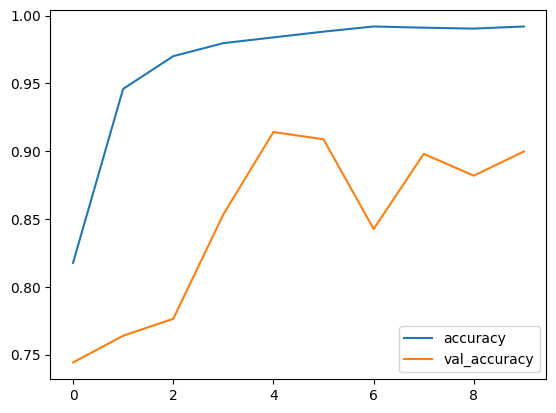

In [10]:
model.plot_history()

In [11]:
model.test(Testing_pad, Y_test)

18/18 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       143
           1       0.94      0.94      0.94       417

    accuracy                           0.91       560
   macro avg       0.89      0.89      0.89       560
weighted avg       0.91      0.91      0.91       560



In [12]:
from Second_Dataset import Second_Dataset

In [13]:
dataset2 = Second_Dataset()
dataset2.preprocess()
dataset2.encode_labels()
dataset2.embed_tokens(max_words,max_len)
dataset2.split()
Training_pad2, Validation_pad2, Testing_pad2, Y_train2, Y_val2, Y_test2 = dataset2.getData()

In [14]:
model2 = BiLSTM(max_words, max_len)

In [27]:
model2.tune(Training_pad2,Y_train2, Validation_pad2, Y_val2, "BiLSTM Dataset2")

Reloading Tuner from Hyperparameter_Tuning\BiLSTM Dataset2\tuner0.json

                The hyperparameter search is complete. The optimal embedding size is 64,
                the optimal units in the BiLSTM is 32
                the optimal number of units in the dense layer is 521 
                and the optimal dropout rate is 0.4.
                


In [23]:
model2.fit(Training_pad2,Y_train2, Validation_pad2, Y_val2)

Epoch 1/50
147/147 [==============================] - 2s 14ms/step - loss: 0.3055 - accuracy: 0.8953 - val_loss: 0.7349 - val_accuracy: 0.6701 - lr: 5.0000e-04
Epoch 2/50
147/147 [==============================] - 2s 14ms/step - loss: 0.2491 - accuracy: 0.9195 - val_loss: 0.9909 - val_accuracy: 0.6376 - lr: 5.0000e-04
Epoch 3/50
147/147 [==============================] - 2s 14ms/step - loss: 0.2147 - accuracy: 0.9348 - val_loss: 1.2599 - val_accuracy: 0.6325 - lr: 5.0000e-04
Epoch 4/50
147/147 [==============================] - 2s 14ms/step - loss: 0.1825 - accuracy: 0.9515 - val_loss: 1.4827 - val_accuracy: 0.6274 - lr: 5.0000e-04
Epoch 5/50
147/147 [==============================] - 2s 15ms/step - loss: 0.1751 - accuracy: 0.9543 - val_loss: 1.4052 - val_accuracy: 0.6274 - lr: 5.0000e-04
Epoch 6/50
147/147 [==============================] - 2s 13ms/step - loss: 0.1501 - accuracy: 0.9618 - val_loss: 1.7127 - val_accuracy: 0.5846 - lr: 5.0000e-04


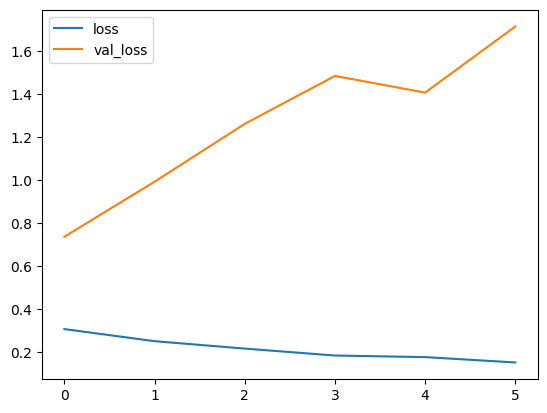

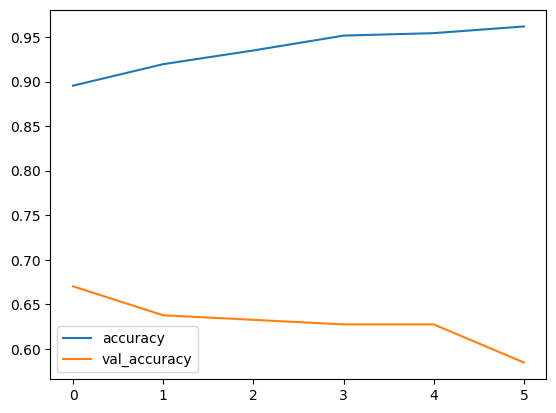

In [24]:
model2.plot_history()

In [25]:
model2.test(Testing_pad2, Y_test2)

19/19 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.58      0.40      0.47       226
           1       0.68      0.82      0.74       360

    accuracy                           0.66       586
   macro avg       0.63      0.61      0.61       586
weighted avg       0.64      0.66      0.64       586

